In [1]:
from clarifai.rest import ClarifaiApp
import scipy.misc

In [2]:
app = ClarifaiApp(api_key='b9b1dc3d4d2f45f5a07978674eab670e')

('Hey! Clarifai Python Client v%s upgrade available.', u'2.0.32')


In [3]:
from clarifai.rest import Image as ClImage
model = app.models.get('moderation')
image = ClImage(url='https://samples.clarifai.com/nsfw.jpg')
model.predict([image])

{u'outputs': [{u'created_at': u'2017-08-23T17:14:11.034771028Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.8826475},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.15422383},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.009157375},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.00013227394},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 8.9625435e-05}]},
   u'id': u'e7cd6b26e2804858abbd3ed9a297dc26',
   u'input': {u'data': {u'image': {u'url': u'https://samples.clarifai.com/nsfw.jpg'}},
    u'id': u'fc6dbca121924bcfa4db21017516e8b2'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T19:20:38.733764Z',
    u'display_name': u'Moderation',
    u'id': u'd16f390eb32cad478c7ae150069bd2c6',
   

In [6]:
image=ClImage(file_obj=open('clarifai_images/nsfw-002.jpg','rb'))

In [7]:
model.predict([image])

{u'outputs': [{u'created_at': u'2017-08-23T17:17:48.141066991Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.79345274},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.20213273},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.08043951},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.0048384983},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.0032322567}]},
   u'id': u'bfd7d64684e847778345f0b8d72abc47',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/f342e8a8a3904d92a21b388171a636e8'}},
    u'id': u'a142e1fd93134a7c98c08c5d6874d786'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [10]:
img=mpimg.imread('clarifai_images/nsfw-002.jpg')

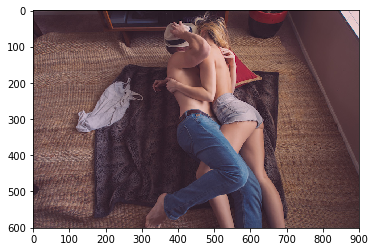

In [11]:
imgplot = plt.imshow(img)

In [12]:
random_perturb = np.random.randn(*img.shape)

In [13]:
img_mod = np.clip(img + 16*np.sign(random_perturb),0,255)

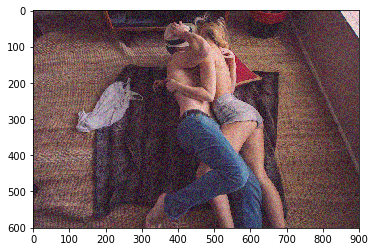

In [14]:
plt.imshow(img_mod/255)

In [15]:
small_image=scipy.misc.imresize(img,25)
plt.imsave('clarifai_images/nsfw-002-small.jpg',small_image)

In [16]:
small_image
small_image_read = plt.imread('clarifai_images/nsfw-002-small.jpg')

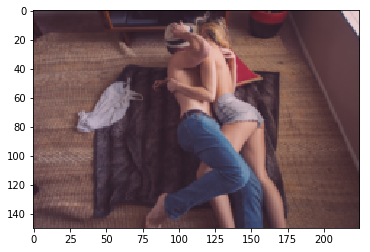

In [17]:
plt.imshow(small_image)

In [19]:
image_small=ClImage(file_obj=open('clarifai_images/nsfw-002-small.jpg','rb'))
model.predict([image_small])

{u'outputs': [{u'created_at': u'2017-08-23T17:19:18.634483949Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.5713531},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.4600715},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.05747693},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.01381366},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.0017741552}]},
   u'id': u'ef15e01eea0f446f878206a415f6c2d3',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/c2d27674b5964887bfd3a0d540e16cc7'}},
    u'id': u'bc18478a10034c1dba92db1c864be4e9'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T19:2

In [20]:
small_img_noisy=scipy.misc.imresize(img_mod,25)
plt.imsave('nsfw-002-small-noisy.jpg',small_img_noisy)

In [21]:
image_small_noisy=ClImage(file_obj=open('nsfw-002-small-noisy.jpg','rb'))
model.predict([image_small_noisy])

{u'outputs': [{u'created_at': u'2017-08-23T17:19:24.401329345Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.5411823},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.3924204},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.16976246},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.02980956},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.007340806}]},
   u'id': u'fbca51cb23174276bf8077fcd0470182',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/c11fa211a94749f8a75bb17efab9b854'}},
    u'id': u'f7b67c258cdb40499211c994aeda2190'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T19:20

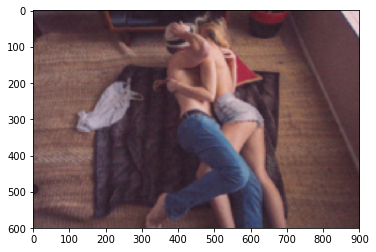

In [22]:
image_resized_noisy=scipy.misc.imresize(small_img_noisy,4.0)
plt.imshow(image_resized_noisy)
plt.imsave('nsfw-002-noisy-resized.jpg',image_resized_noisy)

In [23]:
image_noisy_resized=ClImage(file_obj=open('nsfw-002-noisy-resized.jpg','rb'))
model.predict([image_noisy_resized])

{u'outputs': [{u'created_at': u'2017-08-23T17:19:31.450352371Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.41699144},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.3724931},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.25449094},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.051110953},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 0.003131236}]},
   u'id': u'f6da269201ed4e5ba6a31a03946de342',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/e657fae43075493cb5d9bcd858a4f2d1'}},
    u'id': u'e45d3a09e87645699b6cb870b8aed724'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16T19:

In [25]:
concepts_list = model.predict([image_noisy_resized])['outputs'][0]['data']['concepts']

In [29]:
filter(lambda concept: concept['name'] == 'safe', concepts_list)[0]

{u'app_id': u'main',
 u'id': u'ai_QD1zClSd',
 u'name': u'safe',
 u'value': 0.3724931}

In [49]:
def moderation_dict_reader(concepts_list, preds_array):
    preds_array[0]=filter(lambda concept: concept['name'] == 'safe', concepts_list)[0]['value']
    preds_array[1]=filter(lambda concept: concept['name'] == 'suggestive', concepts_list)[0]['value']
    preds_array[2]=filter(lambda concept: concept['name'] == 'explicit', concepts_list)[0]['value']
    preds_array[3]=filter(lambda concept: concept['name'] == 'drug', concepts_list)[0]['value']
    preds_array[4]=filter(lambda concept: concept['name'] == 'gore', concepts_list)[0]['value']
    return preds_array

In [50]:
def xent_est(x_plus_i, x_minus_i, curr_target):
    image_plus=ClImage(file_obj=open(x_plus_i,'rb'))
    pred_plus=np.zeros((5))
    pred_plus_dict = model.predict([image_plus])['outputs'][0]['data']['concepts']
    pred_plus = moderation_dict_reader(pred_plus_dict, pred_plus)
    pred_plus_t = pred_plus[curr_target]
    
    image_minus=ClImage(file_obj=open(x_minus_i,'rb'))
    pred_minus=np.zeros((5))
    pred_minus_dict = model.predict([image_minus])['outputs'][0]['data']['concepts']
    pred_minus = moderation_dict_reader(pred_minus_dict, pred_minus)
    pred_minus_t = pred_minus[curr_target]
    single_grad_est = (pred_plus_t - pred_minus_t)/delta
    print(single_grad_est)

    return single_grad_est/2.0

In [51]:
def finite_diff_method(curr_sample, curr_target, p_t):
    grad_est = np.zeros((IMAGE_ROWS, IMAGE_COLS, NUM_CHANNELS))
    random_indices = np.random.permutation(dim)
    num_groups = dim / group_size
    print num_groups
    for j in range(num_groups):
        basis_vec = np.zeros((IMAGE_ROWS, IMAGE_COLS, NUM_CHANNELS))
        if j != num_groups-1:
            curr_indices = random_indices[j*group_size:(j+1)*group_size]
        elif j == num_groups-1:
            curr_indices = random_indices[j*group_size:]
        per_c_indices = curr_indices%(IMAGE_COLS*IMAGE_ROWS)
        channel = curr_indices/(IMAGE_COLS*IMAGE_ROWS)
        row = per_c_indices/IMAGE_COLS
        col = per_c_indices % IMAGE_COLS
        for i in range(len(curr_indices)):
            basis_vec[row[i], col[i], channel[i]] = 1.
        image_plus_i = np.clip(curr_sample + delta * basis_vec, CLIP_MIN, CLIP_MAX)
        x_plus_i = 'clarifai_images/moderation_image_plus.jpg'
        plt.imsave(x_plus_i,image_plus_i/255)
        image_minus_i = np.clip(curr_sample - delta * basis_vec, CLIP_MIN, CLIP_MAX)
        x_minus_i = 'clarifai_images/moderation_image_minus.jpg'
        plt.imsave(x_minus_i,image_minus_i/255)
        
        single_grad_est = xent_est(x_plus_i, x_minus_i, curr_target)
        for i in range(len(curr_indices)):
            grad_est[row[i], col[i], channel[i]] = single_grad_est.reshape((1))
            
    # Getting gradient of the loss
    loss_grad = -1.0 * grad_est/p_t

    return loss_grad

In [76]:
import time
time1 = time.time()
success = 0
avg_l2_perturb = 0
curr_image='clarifai_images/nsfw-002-small.jpg'
curr_sample = np.array(mpimg.imread(curr_image),dtype=float)
curr_sample=curr_sample[:,:,:3]

BATCH_SIZE=1
IMAGE_ROWS=curr_sample.shape[0]
IMAGE_COLS=curr_sample.shape[1]
NUM_CHANNELS=curr_sample.shape[2]
dim=IMAGE_ROWS*IMAGE_COLS*NUM_CHANNELS
delta=0.01
CLIP_MIN=0
CLIP_MAX=255
group_size=1000
eps=8
norm='linf'

image_cl=ClImage(file_obj=open(curr_image,'rb'))

curr_prediction = np.zeros((5))
curr_predict_dict = model.predict([image_cl])['outputs'][0]['data']['concepts']
curr_prediction = moderation_dict_reader(curr_predict_dict, curr_prediction)

curr_target = 0

p_t = curr_prediction[curr_target]

loss_grad = finite_diff_method(curr_sample,curr_target, p_t)
np.save('loss_grad_moderation.npy',loss_grad)

# Getting signed gradient of loss
if norm == 'linf':
    normed_loss_grad = np.sign(loss_grad)
elif norm == 'l2':
    grad_norm = np.linalg.norm(loss_grad.reshape(dim))
    indices = np.where(grad_norm != 0.0)
    normed_loss_grad = np.zeros_like(curr_sample)
    normed_loss_grad[indices] = loss_grad[indices]/grad_norm[indices, None, None, None]

# eps_mod = eps - args.alpha
image_adv = np.clip(curr_sample - eps * normed_loss_grad, CLIP_MIN, CLIP_MAX)
x_adv = 'clarifai_images/moderation_image_adv.jpg'
plt.imsave(x_adv,image_adv/255)

# Getting the norm of the perturbation
perturb_norm = np.linalg.norm((image_adv-curr_sample).reshape(dim))
perturb_norm_batch = np.mean(perturb_norm)
avg_l2_perturb += perturb_norm_batch

image_adv_cl=ClImage(file_obj=open(x_adv,'rb'))

adv_prediction = np.zeros((5))
adv_predict_dict = model.predict([image_adv_cl])['outputs'][0]['data']['concepts']
adv_prediction = moderation_dict_reader(adv_predict_dict, adv_prediction)
success += np.sum(np.argmax(adv_prediction) == curr_target)

success = 100.0 * float(success)

# success = 100.0 - success

time2 = time.time()
print('Average l2 perturbation: {}'.format(avg_l2_perturb))
print('Total time: {}'.format(time2-time1))

101
0.037807
0.002732
0.246
-0.451666
-0.41274
0.209963
0.282717
0.03304
0.596204
-0.143856
0.031483
0.413298
0.063586
0.314384
-0.238478
-0.570742
0.180614
0.349092
0.162816
-0.616
-0.022102
-0.52988
0.021726
-0.524986
0.581735
-0.947774
-0.839842
-0.48979
0.47286
0.819266
-0.70758
0.79196
0.1757
0.07254
-0.15515
-0.19902
0.389188
-0.658536
0.025737
0.292453
-0.113937
-0.049967
0.18342
0.33394
-0.61335
0.265837
0.868475
0.127128
-0.13572
0.690603
-0.26313
-0.024057
-0.76093
-0.229115
-0.65828
0.33937
0.645157
0.576722
0.13554
-0.682015
0.73513
0.291014
-0.274143
-0.13271
-0.188289
-0.143016
0.03832
0.199717
-0.20045
0.613284
-0.140828
0.00126
0.11205
-0.442627
0.30563
0.094145
0.348693
-0.8794
0.140965
0.132012
0.127053
0.070852
0.470125
-0.388378
-0.396586
0.220853
0.279254
-0.237096
0.652158
0.446787
0.11754
-0.62056
-0.717843
0.28581
0.078824
-0.445146
-0.200692
-0.713015
0.39788
-0.17021
-0.256703
Average l2 perturbation: 2545.58441227
Total time: 189.794533014


In [77]:
curr_prediction

array([ 0.4600715 ,  0.5713531 ,  0.05747693,  0.01381366,  0.00177416])

In [78]:
adv_prediction

array([ 0.56291   ,  0.01168264,  0.48902795,  0.00372724,  0.0015133 ])

In [79]:
p_t

0.46007150000000002

In [80]:
success

100.0

In [81]:
perturb_norm

2545.5844122715712

In [82]:
curr_predict_dict

[{u'app_id': u'main',
  u'id': u'ai_RtXh5qkR',
  u'name': u'suggestive',
  u'value': 0.5713531},
 {u'app_id': u'main',
  u'id': u'ai_QD1zClSd',
  u'name': u'safe',
  u'value': 0.4600715},
 {u'app_id': u'main',
  u'id': u'ai_V76bvrtj',
  u'name': u'explicit',
  u'value': 0.05747693},
 {u'app_id': u'main',
  u'id': u'ai_8QQwMjQR',
  u'name': u'drug',
  u'value': 0.01381366},
 {u'app_id': u'main',
  u'id': u'ai_kBBGf7r8',
  u'name': u'gore',
  u'value': 0.0017741552}]

In [83]:
adv_predict_dict

[{u'app_id': u'main',
  u'id': u'ai_QD1zClSd',
  u'name': u'safe',
  u'value': 0.56291},
 {u'app_id': u'main',
  u'id': u'ai_V76bvrtj',
  u'name': u'explicit',
  u'value': 0.48902795},
 {u'app_id': u'main',
  u'id': u'ai_RtXh5qkR',
  u'name': u'suggestive',
  u'value': 0.011682636},
 {u'app_id': u'main',
  u'id': u'ai_8QQwMjQR',
  u'name': u'drug',
  u'value': 0.0037272417},
 {u'app_id': u'main',
  u'id': u'ai_kBBGf7r8',
  u'name': u'gore',
  u'value': 0.0015133034}]

In [ ]:
small_adv=plt.imread('nsfw_image_adv.jpg')
image_resized_noisy=scipy.misc.imresize(small_adv,4.0)
plt.imshow(image_resized_noisy)
plt.imsave('nsfw-002-noisy-resized.jpg',image_resized_noisy)